In [1]:
%load_ext autoreload
%autoreload 2
%pip -q install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import torch
from torch import optim

from models import DRQNetwork
from behaviorcloning import clone_behavior

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cloned_policy_path = "./cloned_policy"

policy_net = DRQNetwork(
    state_size=42,
    action_size=7,
    hidden_size=512,
    num_recurrent_layers=2,
).to(device)

optimizer = optim.AdamW(
    policy_net.parameters(),
    lr=1e-4,
    weight_decay=1e-2
)

losses = clone_behavior(policy_net, optimizer, device, num_episodes=2000)

episode=0, loss=1.945792317390442
episode=20, loss=1.3513274192810059
episode=40, loss=1.1697688102722168
episode=60, loss=1.3117694854736328
episode=80, loss=0.9870839715003967
episode=100, loss=1.2207056283950806
episode=120, loss=0.7917444109916687
episode=140, loss=1.3125053644180298
episode=160, loss=0.8663197159767151
episode=180, loss=1.1727919578552246
episode=200, loss=1.0166798830032349
episode=220, loss=0.9908393025398254
episode=240, loss=1.1055121421813965
episode=260, loss=0.8253377676010132
episode=280, loss=1.1322754621505737
episode=300, loss=0.7821921706199646
episode=320, loss=0.6853615045547485
episode=340, loss=1.355098009109497
episode=360, loss=0.9087615609169006
episode=380, loss=1.1855300664901733
episode=400, loss=0.756512463092804
episode=420, loss=1.0337307453155518
episode=440, loss=1.0483757257461548
episode=460, loss=0.8698225021362305
episode=480, loss=1.3121211528778076
episode=500, loss=0.9702690839767456
episode=520, loss=0.9496014714241028
episode=54

Text(0, 0.5, 'Training loss')

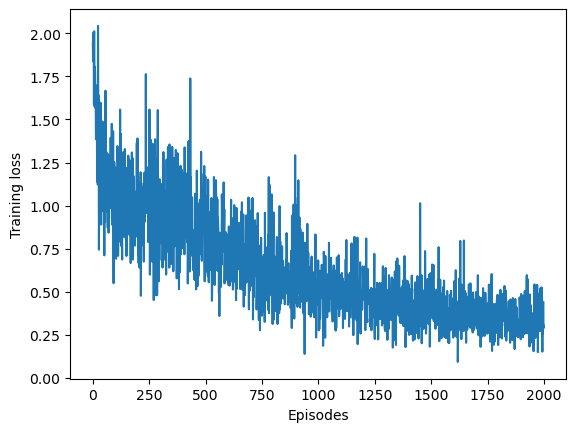

In [4]:
fig, ax = plt.subplots()
ax.plot(losses)
ax.set_xlabel("Episodes")
ax.set_ylabel("Training loss")

In [5]:
policy_net.save(cloned_policy_path)

Model saved to ./cloned_policy
